# Biostat 682 Lecture 1: Screening Test Example: PPV & NPV in Python and R

This notebook demonstrates how to compute **Positive Predictive Value (PPV)** and **Negative Predictive Value (NPV)** using the breast cancer screening test example. We will use both **Python** and **R** within Google Colab to illustrate these concepts.

## 1) Setup R magic

First, we need to set up the R environment in Google Colab by installing and loading the `rpy2` extension. This allows us to run R code directly within Python code cells.

In [14]:
# Install rpy2 to enable running R code in Colab
!pip -q install rpy2==3.5.11
# Load the rpy2 extension for IPython
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## 2) Compute PPV and NPV in Python

Now, let's compute the PPV and NPV using Python. We will use the parameters from the lecture and apply the formulas derived from Bayes' theorem.

In [15]:
# Parameters from the lecture
sensitivity = 0.82     # P(test+ | disease+) - Probability of a positive test given the disease is present (True Positive Rate)
specificity = 0.99     # P(test- | disease-) - Probability of a negative test given the disease is absent (True Negative Rate)
prev = 0.10            # prevalence P(disease+) - Probability of the disease being present in the population

# Derived probabilities
# P(test+) = P(test+|disease+) * P(disease+) + P(test+|disease-) * P(disease-)
# P(test+|disease-) = 1 - P(test-|disease-) = 1 - specificity
# P(disease-) = 1 - prevalence
p_test_pos = sensitivity * prev + (1-specificity) * (1-prev)

# PPV = P(disease+ | test+) = [P(test+|disease+) * P(disease+)] / P(test+)
ppv = sensitivity * prev / p_test_pos

# P(test-) = P(test-|disease+) * P(disease+) + P(test-|disease-) * P(disease-)
# P(test-|disease+) = 1 - P(test+|disease+) = 1 - sensitivity
p_test_neg = (1-sensitivity) * prev + specificity * (1-prev)

# NPV = P(disease- | test-) = [P(test-|disease-) * P(disease-)] / P(test-)
npv = specificity * (1-prev) / p_test_neg

ppv, npv

(0.901098901098901, 0.9801980198019802)

## 3) Compute PPV and NPV in R

Next, we will perform the same calculations for PPV and NPV using R. We will use the R magic command to execute the R code within a Python notebook.

In [16]:
%%R
# Parameters from the lecture
sensitivity <- 0.82 # P(test+ | disease+) - Probability of a positive test given the disease is present (True Positive Rate)
specificity <- 0.99 # P(test- | disease-) - Probability of a negative test given the disease is absent (True Negative Rate)
prev <- 0.10 # prevalence P(disease+) - Probability of the disease being present in the population

# Derived probabilities
# P(test+) = P(test+|disease+) * P(disease+) + P(test+|disease-) * P(disease-)
# P(test+|disease-) = 1 - P(test-|disease-) = 1 - specificity
# P(disease-) = 1 - prevalence
p_test_pos <- sensitivity * prev + (1-specificity) * (1-prev)

# PPV = P(disease+ | test+) = [P(test+|disease+) * P(disease+)] / P(test+)
ppv <- sensitivity * prev / p_test_pos

# P(test-) = P(test-|disease+) * P(disease+) + P(test-|disease-) * P(disease-)
# P(test-|disease+) = 1 - P(test+|disease+) = 1 - sensitivity
p_test_neg <- (1-sensitivity) * prev + specificity * (1-prev)

# NPV = P(disease- | test-) = [P(test-|disease-) * P(disease-)] / P(test-)
npv <- specificity * (1-prev) / p_test_neg

c(PPV=ppv, NPV=npv)

      PPV       NPV 
0.9010989 0.9801980 


**Remark**

This example highlights the relationship between **sensitivity**, **specificity**, and **predictive values** through the application of **Bayes' theorem**. It demonstrates how even with high sensitivity and specificity, the **prevalence** of the disease (the prior probability) significantly impacts the predictive values.

As shown in the calculations, with a sensitivity of 0.82, a specificity of 0.99, and a prevalence of 0.10, the results are approximately **PPV ≈ 0.90** and **NPV ≈ 0.98**. This illustrates that even with a highly accurate test, a positive result in a low-prevalence population still has a significant chance of being a false positive. Conversely, a negative result is highly reliable in this scenario.

## 4) Convert R Variable to Python

We also demonstrated how to run R code within a Python notebook using `rpy2`, including generating random numbers and creating histograms in R and then accessing and plotting the generated data in Python.

In [17]:
# Import the numpy library for numerical operations in Python
import numpy as np

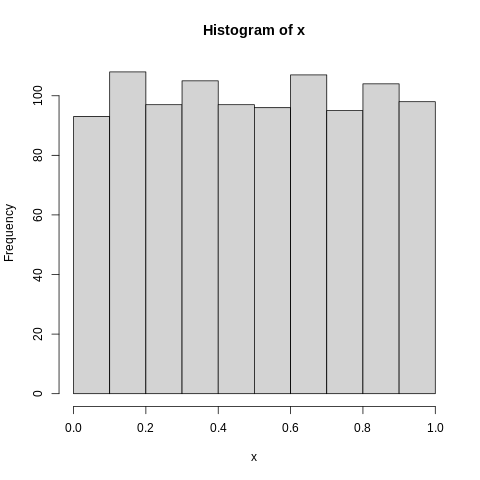

In [18]:
# Use the R magic command to execute R code
# -o x exports the variable x from R to Python
%%R -o x
# Generate 1000 random numbers from a uniform distribution in R
x <- runif(1000)
# Create a histogram of the generated numbers in R
hist(x)

(array([ 93., 109.,  98., 105.,  95.,  96., 109.,  93., 104.,  98.]),
 array([0.00128939, 0.10113565, 0.20098191, 0.30082818, 0.40067444,
        0.5005207 , 0.60036696, 0.70021322, 0.80005949, 0.89990575,
        0.99975201]),
 <BarContainer object of 10 artists>)

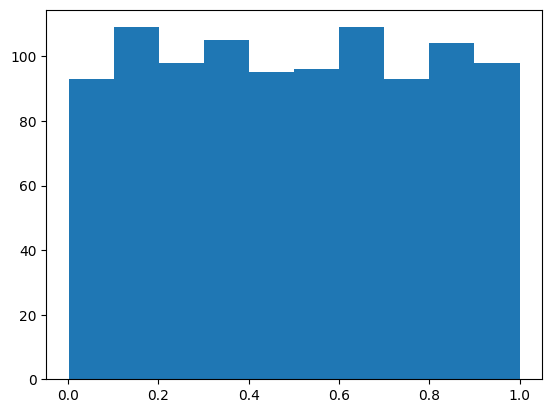

In [19]:
# Import the matplotlib.pyplot library for plotting in Python
import matplotlib.pyplot as plt
# Create a histogram of the variable x (which was exported from R) using matplotlib
plt.hist(x)

## 5) Convert Python Variable to R

We can also convert Python variables to R variables using the `-i` flag in the `%%R` magic command.

In [20]:
# Define a Python variable
python_variable = [1, 2, 3, 4, 5]
print("Python variable:", python_variable)

Python variable: [1, 2, 3, 4, 5]


In [21]:
%%R -i python_variable
# Now 'python_variable' is available in R as a vector
print("R variable:")
print(python_variable)

[1] "R variable:"
[1] 1 2 3 4 5
